In [33]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
app = pd.read_csv('apps.csv')
app.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [48]:
app.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [51]:
# List of characters to remove
chars_to_remove = [',','$','+']
# List of column names to clean
cols_to_clean = ['Installs','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        app[col] = app[col].astype(str).str.replace(char,'')
    # Convert col to numeric
    app[col] = pd.to_numeric(app[col]) 

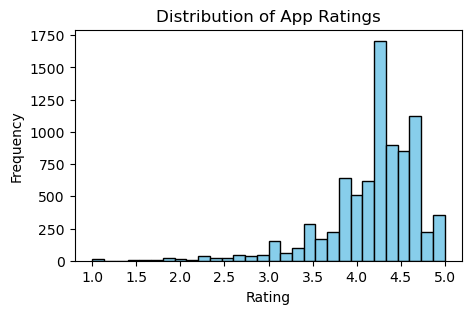

In [52]:
# Plotting the distribution of app ratings
plt.figure(figsize=(5,3), facecolor='white')
plt.hist(app['Rating'],bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Calculate the average rating for each category
average_ratings = app.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

# Display the top 10 categories by average rating
print(average_ratings)

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
Name: Rating, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


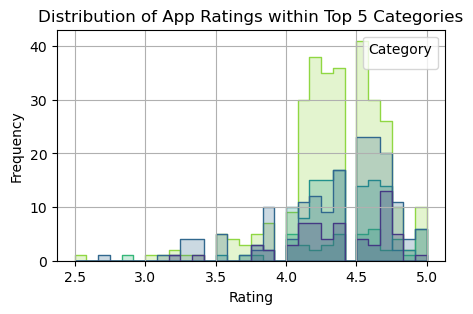

In [54]:
# Filter the dataset for the top 10 categories
top_categories = ['EVENTS', 'EDUCATION', 'ART_AND_DESIGN', 'BOOKS_AND_REFERENCE', 'PERSONALIZATION']
top_categories_df = app[app['Category'].isin(top_categories)]

# Plotting the distribution of ratings within the top 5 categories
plt.figure(figsize=(5,3), facecolor='white')
sns.histplot(data=top_categories_df, x='Rating', hue='Category', element='step', bins=30, palette='viridis')
plt.title('Distribution of App Ratings within Top 5 Categories')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(title='Category')
plt.grid(True)
plt.show()

In [55]:
# Calculate the count of free and paid apps
free_paid_count = app['Type'].value_counts()

# Calculate the average rating for free and paid apps
average_rating_free_paid = app.groupby('Type')['Rating'].mean()

# Display the results
print('Count of Free vs Paid Apps:')
print(free_paid_count)
print('\Average Rating for Free vs Paid Apps:')
print(average_rating_free_paid)

Count of Free vs Paid Apps:
Type
Free    8903
Paid     756
Name: count, dtype: int64
\Average Rating for Free vs Paid Apps:
Type
Free    4.166372
Paid    4.259603
Name: Rating, dtype: float64


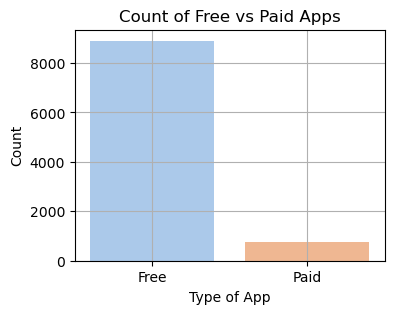

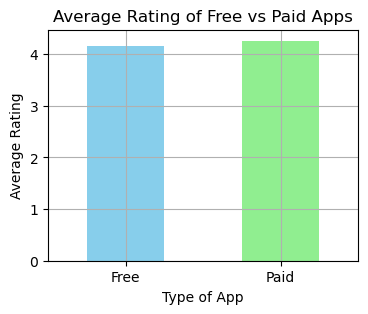

In [56]:
# Plotting the count of free vs paid apps
plt.figure(figsize=(4,3), facecolor='white')
sns.countplot(x='Type', data=app, palette='pastel')
plt.title('Count of Free vs Paid Apps')
plt.xlabel('Type of App')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plotting the average rating for free vs paid apps
plt.figure(figsize=(4,3), facecolor='white')
app.groupby('Type')['Rating'].mean().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Rating of Free vs Paid Apps')
plt.xlabel('Type of App')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


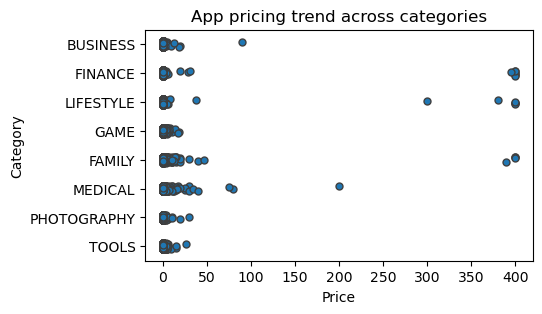

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(5,3) 

# Select a few popular app categories
popular_app_cats = app[app["Category"].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x ='Price', y = 'Category',data=popular_app_cats, jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]  
apps_above_200 

In [60]:
review = pd.read_csv('user_reviews.csv')
# Join and merge the two dataframe
merged_df = pd.merge(app, review, on = 'App', how = "inner")

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


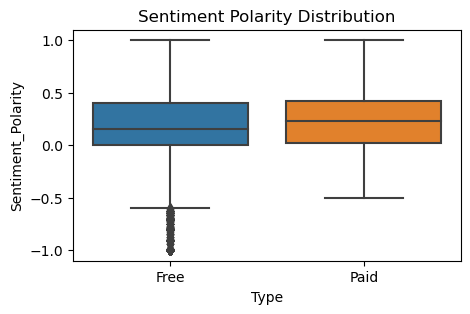

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(5,3)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
merged_df.head()